<a href="https://colab.research.google.com/github/theegma/sds_tddl_myown/blob/master/Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train = pd.read_csv('drive/My Drive/Study/TextData/Exam/train.csv')
test = pd.read_csv('drive/My Drive/Study/TextData/Exam/test.csv')

In [0]:
print(train.info())
print(train.columns)
print(train.label.value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50000 non-null  int64  
 1   text        50000 non-null  object 
 2   headline    50000 non-null  object 
 3   rating      50000 non-null  float64
 4   Sex         34666 non-null  object 
 5   Ethnicity   38888 non-null  object 
 6   Month       50000 non-null  object 
 7   Category    50000 non-null  object 
 8   Locality    35020 non-null  object 
 9   domain      50000 non-null  object 
 10  label       50000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 4.2+ MB
None
Index(['Unnamed: 0', 'text', 'headline', 'rating', 'Sex', 'Ethnicity', 'Month',
       'Category', 'Locality', 'domain', 'label'],
      dtype='object')
1    0.85492
0    0.14508
Name: label, dtype: float64


In [0]:
train

,Unnamed: 0,text,headline,rating,Sex,Ethnicity,Month,Category,Locality,domain,label
0,19769,I paid for indoor parking and when I arrived n...,I paid for indoor parking...,2.0,male,European,2018-06-01,travel_holidays,San Leandro,https://trustpilot.com/review/www.expressopark...,0
1,127049,Part's were easy to find and great information...,easy to find and order parts with great inform...,5.0,male,European,2016-05-01,transportation,Marlton,https://trustpilot.com/review/www.partsgeek.com,1
2,211740,We had a shipping error and Legacy Headstones ...,Excellent customer service and quality products!!,5.0,male,European,2017-06-01,companies,"East Liverpool, OH 43920",https://trustpilot.com/review/legacyheadstones...,1
3,116665,Prices are great and service too keep up the g...,Prices are great and service too keep …,4.0,NaN,NaN,2017-06-01,travel_holidays,NaN,https://trustpilot.com/review/justfly.com,1
4,19867,this is a great site and easy to use. I like t...,"great site, easy to use",4.0,female,European,2016-08-01,travel_holidays,NaN,https://trustpilot.com/review/justfly.com,1
...,...,...,...,...,...,...,...,...,...,...,...
49995,89877,Looking forward to do more business in the future,Excellent service,5.0,NaN,NaN,2015-10-01,transportation,Tempe,https://trustpilot.com/review/autoequipmentdep...,1
49996,208633,"I ordered business cards, New name tag and a P...",I ordered business cards,5.0,female,European,2017-08-01,companies,"Norwood, MA",https://trustpilot.com/review/bestprintbuy.com,1
49997,177975,TherapyNotes is an every growing program. The...,Making notes simple,5.0,female,European,2015-10-01,computer,"Horsham, PA",https://trustpilot.com/review/therapynotes.com,1
49998,81323,My experience was great from start to finish. ...,Transformed my Resume!!,5.0,male,European,2016-06-01,other,NaN,https://trustpilot.com/review/topresume.com,1


In [0]:
test

,Unnamed: 0,text,headline,rating,Sex,Ethnicity,Month,Category,Locality,domain,label
0,188547,Express Medical Supply had the product I neede...,As advertised,5.0,female,European,2013-10-01,health_wellbeing,Fenton,https://trustpilot.com/review/www.exmed.net,1
1,100030,i ordered about 6 books and they all came very...,amazing!!,5.0,NaN,European,2017-02-01,entertainment,Tukwila,https://trustpilot.com/review/www.thriftbooks.com,1
2,167232,I've always found 777 to be courteous and reli...,I've always found 777 to be courteous…,5.0,female,EastAsian,2018-06-01,transportation,"Long Island City, NY",https://trustpilot.com/review/dial7.com,1
3,38533,Had windows vista.. ordered windows 7 and inst...,purchase of windows 7,5.0,male,European,2015-08-01,entertainment,NaN,https://trustpilot.com/review/www.mmoga.com,1
4,42494,I would recommend Money Lion to anyone who has...,I would recommend Money Lion to anyone…,5.0,female,European,2018-03-01,money,"Sandy, UT 84091",https://trustpilot.com/review/moneylion.com,1
...,...,...,...,...,...,...,...,...,...,...,...
199995,109228,I was extremely disappointed about 3 things. F...,Stay away !!!!!!!!!!!!,1.0,male,European,2013-06-01,travel_holidays,NaN,https://trustpilot.com/review/bookit.com,0
199996,50483,"GOOD SERVICE ON PHONE, SUFFICIENT STOCK ON HAN...",PART ORDER,5.0,male,European,2017-03-01,food_beverage,"Addison, IL",https://trustpilot.com/review/partstown.com,1
199997,174623,"Quick checkout and great prices, wish the adde...",Quick checkout and great prices,4.0,male,European,2018-05-01,travel_holidays,NaN,https://trustpilot.com/review/justfly.com,1
199998,181693,My custom pens are absolutely beautiful! As a...,Absolutely Beautiful!,5.0,female,European,2017-02-01,companies,"Shelbyville, TN",https://trustpilot.com/review/www.pens.com,1


#1 

1. Train a bag of words based classifier to predict the label column (use train.csv). 
  - **I quote a code from Snorre's!!**, which uses CountVectorizer with 1-3 grams.
2. Estimate proportions using the Classify&Count method on the test set (test.csv) for each group defined by the metadata columns. 
3. Report the proportional classification error of each metadata column and conclude which has the largest proportional bias.


In [0]:
# 1. Train a bag of words based classifier to predict the label column (use train.csv). 

In [0]:
## Download script for searching the hyperparameters with bayesian optimization using the hyperopt package.
import requests
with open('get_bow_baseline.py','w') as f:
    f.write(requests.get('https://raw.githubusercontent.com/snorreralund/test_tokenization/master/get_bow_baseline.py').text)
f.close()

In [0]:
import get_bow_baseline as baseline
baseline = baseline.TokenizationTest(train,test,MAX_EVALS=10,scoring_function='accuracy_score',y_col='label',text_col='text')
import warnings; warnings.simplefilter('ignore')
import nltk
tokenizer = nltk.tokenize.TweetTokenizer().tokenize
baseline.evaluate('nltk_tweet',tokenizer)

100%|██████████| 10/10 [01:45<00:00, 10.53s/it, best loss: 0.08423111111111103]
Final accuracy and roc_auc score of tokenizer (nltk_tweet) + nb_log: 0.933 and 0.957


In [0]:
%time y_pred = baseline.predict(test.text.values)
test['bow_prob'] = y_pred[:,1]
test['bow_pred'] = (test.bow_prob > 0.5).astype(int)

CPU times: user 4.42 s, sys: 9.95 ms, total: 4.43 s
Wall time: 4.43 s


0         0.997237
1         0.990303
2         0.983785
3         0.959918
4         0.998000
            ...   
199995    0.000092
199996    0.997678
199997    0.994025
199998    0.999998
199999    0.988076
Name: bow_prob, Length: 200000, dtype: float64
0         1
1         1
2         1
3         1
4         1
         ..
199995    0
199996    1
199997    1
199998    1
199999    1
Name: bow_pred, Length: 200000, dtype: int64
**Class freq in train**
 male      0.540962
female    0.459038
Name: Sex, dtype: float64 **Class freq in test**
 male      0.543224
female    0.456776
Name: Sex, dtype: float64


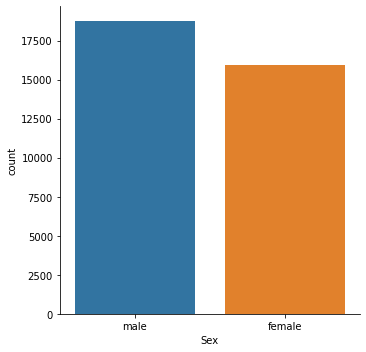

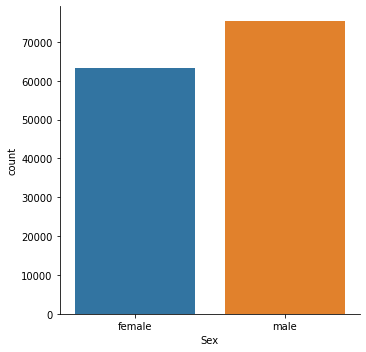

**Class freq in train**
 European      0.821616
Hispanic      0.100597
EastAsian     0.022063
SouthAsian    0.021523
Muslim        0.014246
African       0.013449
Greek         0.005914
Jewish        0.000591
Name: Ethnicity, dtype: float64 **Class freq in test**
 European      0.824810
Hispanic      0.100657
EastAsian     0.021429
SouthAsian    0.021164
African       0.013378
Muslim        0.012940
Greek         0.005166
Jewish        0.000457
Name: Ethnicity, dtype: float64


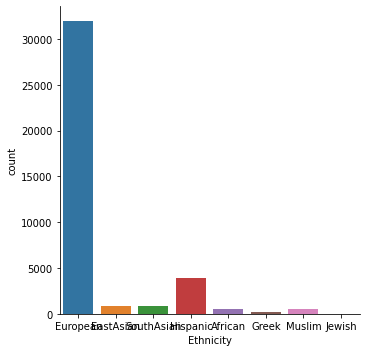

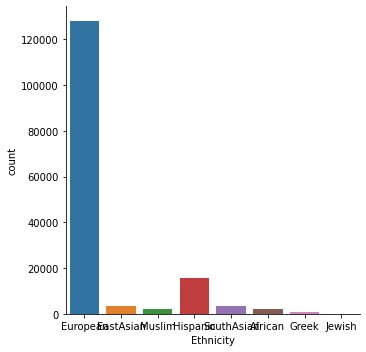

**Class freq in train**
 travel_holidays     0.14652
home_garden         0.11846
clothes_fashion     0.11316
transportation      0.10312
health_wellbeing    0.07732
money               0.07430
entertainment       0.06588
leisure             0.06186
companies           0.03776
electronics         0.03738
computer            0.02736
food_beverage       0.02530
other               0.02404
sport               0.01880
art                 0.01728
mobile_internet     0.01290
craftsman           0.01150
online_services     0.00982
public_services     0.00568
tobacco-products    0.00322
legal_services      0.00284
cloud_computing     0.00160
kids                0.00154
erotic              0.00114
animals_and_pets    0.00060
gambling            0.00048
utilities           0.00014
Name: Category, dtype: float64 **Class freq in test**
 travel_holidays     0.143830
home_garden         0.120415
clothes_fashion     0.111670
transportation      0.104515
health_wellbeing    0.076670
money              

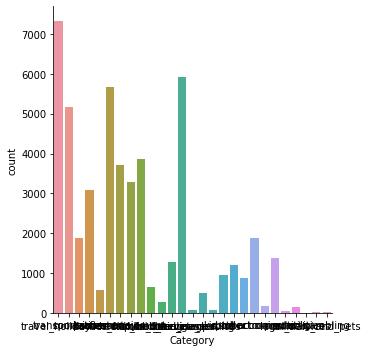

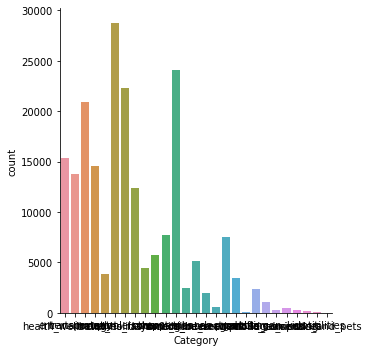

In [0]:
print(test['bow_prob'])
print(test['bow_pred'])

meta_cols = ['Sex', 'Ethnicity', 'Category', 'Locality', 'domain']
meta_cols_sub = ['Sex', 'Ethnicity', 'Category']

import seaborn as sns

for c in meta_cols_sub:
  train_classfreq = train[c].value_counts(normalize=True)
  test_classfreq = test[c].value_counts(normalize=True)
  print("**Class freq in train**\n",train_classfreq, "**Class freq in test**\n" , test_classfreq)
  sns.catplot(x=c, kind="count", data=train)
  sns.catplot(x=c, kind="count", data=test)

  plt.show()


In [0]:
# 2. Estimate proportions using the Classify & Count method on the test set (test.csv) for each group defined by the metadata columns. 


# from sklearn.metrics import confusion_matrix
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives
import tensorflow as tf

## Estimate diffential bias. 
meta_cols = ['Sex', 'Ethnicity', 'Category', 'Locality', 'domain']

dat = []
for c in meta_cols:
  train_unique_cat_in_col = train[c].unique()
  test_unique_cat_in_col = test[c].unique()
  print("List of unique categories in train vs. test:", train_unique_cat_in_col, test_unique_cat_in_col)
  print("Num of unique categories in train vs. test::", len(train_unique_cat_in_col), len(test_unique_cat_in_col))
    # Remark: 'Locality', 'domain' has A LOT more of unique categories (wrt train vs. test)

  for u in test_unique_cat_in_col:
    tempdf = test[test[c]==u] # To reduce the size during the loop
    # Remove groups if n_train is too small
    if len(tempdf)<50:
      continue 
  
    # This part is from my previous assignment.
    tp, fp = tf.keras.metrics.TruePositives(), tf.keras.metrics.FalsePositives()
    tn, fn = tf.keras.metrics.TrueNegatives(), tf.keras.metrics.FalseNegatives()
    tp.update_state(y_true = tempdf['label'], y_pred = tempdf['bow_pred'])
    fp.update_state(y_true = tempdf['label'], y_pred = tempdf['bow_pred'])
    tn.update_state(y_true = tempdf['label'], y_pred = tempdf['bow_pred'])
    fn.update_state(y_true = tempdf['label'], y_pred = tempdf['bow_pred'])
    tp, fp = tp.result().numpy(), fp.result().numpy()
    tn, fn = tn.result().numpy(), fn.result().numpy()
    n = len(tempdf)

    pos_pred = fp + tp
    prop_pred = pos_pred/n

    # Compute true proportions
    pos_true = tp + fn
    neg_true = tn + fp
    prop_true = pos_true/n

    n_train = len(train[train[c]==u])

    d = {'meta_col':c, 'class_in_meta_col':u,
         'tp':tp,'fp':fp,'tn':tn,'fn':fn,'n':len(tempdf),
         'pos':pos_true,'neg':neg_true,
         'n_train': n_train}
    dat.append(d)
diff_bias = pd.DataFrame(dat).dropna().reset_index(drop=True)

List of unique categories in train vs. test: ['male' nan 'female'] ['female' nan 'male']
Num of unique categories in train vs. test:: 3 3
List of unique categories in train vs. test: ['European' nan 'EastAsian' 'SouthAsian' 'Hispanic' 'African' 'Greek'
 'Muslim' 'Jewish'] ['European' 'EastAsian' 'Muslim' 'Hispanic' nan 'SouthAsian' 'African'
 'Greek' 'Jewish']
Num of unique categories in train vs. test:: 9 9
List of unique categories in train vs. test: ['travel_holidays' 'transportation' 'companies' 'leisure' 'craftsman'
 'clothes_fashion' 'money' 'entertainment' 'health_wellbeing'
 'mobile_internet' 'public_services' 'food_beverage' 'home_garden'
 'cloud_computing' 'online_services' 'kids' 'sport' 'other' 'art'
 'electronics' 'tobacco-products' 'computer' 'erotic' 'legal_services'
 'utilities' 'animals_and_pets' 'gambling'] ['health_wellbeing' 'entertainment' 'transportation' 'money' 'sport'
 'travel_holidays' 'clothes_fashion' 'leisure' 'other' 'computer'
 'companies' 'home_garden' '

In [0]:
# Repository

    # tn, fp, fn, tp = confusion_matrix(tempdf['label'], tempdf['bow_pred'], labels=[0,1]).ravel()
      # Doesn't work "ValueError: At least one label specified must be in y_true" -- I guess it's because it's non-existent


    # pos_pred = tempdf['bow_pred'].sum()
    # n = len(tempdf)
    # pos_true = tempdf['label'].sum()

    # print("Proportion for unique class '{}' in meta column '{}':".format(u,c), "%6.4f vs. %6.4f (True vs. Pred)" %(prop_true, prop_pred))


In [0]:
# 3. Report the proportional classification error of each metadata column and conclude which has the largest proportional bias.

diff_bias['proportional_error_abs'] = diff_bias.pos-(diff_bias.tp+diff_bias.fp)
diff_bias['proportional_error_p'] = (diff_bias.pos-(diff_bias.tp+diff_bias.fp))/diff_bias.pos
diff_bias['clf_pos_freq'] = (diff_bias.tp+diff_bias.fp) / diff_bias.n
diff_bias['pos_freq'] = diff_bias['pos']/diff_bias.n
diff_bias['proportional_error_freq'] = diff_bias['pos_freq'] - diff_bias['clf_pos_freq']

## Sort groups by highest proportional error
diff_bias.sort_values('proportional_error_p')[['meta_col','class_in_meta_col','pos','neg','pos_freq','clf_pos_freq', 'proportional_error_freq','proportional_error_abs','proportional_error_p']]

,meta_col,class_in_meta_col,pos,neg,pos_freq,clf_pos_freq,proportional_error_freq,proportional_error_abs,proportional_error_p
736,domain,https://trustpilot.com/review/yodel.com,1.0,57.0,0.017241,0.068966,-0.051724,-3.0,-3.000000
836,domain,https://trustpilot.com/review/www.expedia.com,5.0,77.0,0.060976,0.121951,-0.060976,-5.0,-1.000000
945,domain,https://trustpilot.com/review/www.fedex.com,7.0,70.0,0.090909,0.181818,-0.090909,-7.0,-1.000000
811,domain,https://trustpilot.com/review/www.facebook.com,33.0,28.0,0.540984,0.770492,-0.229508,-14.0,-0.424242
474,domain,https://trustpilot.com/review/www.airbnb.com,16.0,89.0,0.152381,0.209524,-0.057143,-6.0,-0.375000
...,...,...,...,...,...,...,...,...,...
1001,domain,https://trustpilot.com/review/trugreen.com,40.0,16.0,0.714286,0.642857,0.071429,4.0,0.100000
964,domain,https://trustpilot.com/review/www.economycarre...,125.0,33.0,0.791139,0.708861,0.082278,13.0,0.104000
992,domain,https://trustpilot.com/review/www.tripadvisor.com,54.0,10.0,0.843750,0.750000,0.093750,6.0,0.111111
901,domain,https://trustpilot.com/review/foxpaw.com,86.0,14.0,0.860000,0.750000,0.110000,11.0,0.127907


In [0]:
import numpy as np
import sklearn.metrics

for c in meta_cols:
  diff_bias_temp = diff_bias[diff_bias['meta_col']==c]
  print("For metadata column '{}' ".format(c))
  print('Pearson r: %.4f'%np.corrcoef(diff_bias_temp['pos_freq'],diff_bias_temp.clf_pos_freq)[0][1])
  print('RMSD freq: %.4f'%sklearn.metrics.mean_squared_error(diff_bias_temp.pos_freq, diff_bias_temp.clf_pos_freq))
  print('RMSD abs: %.4f'%sklearn.metrics.mean_squared_error(diff_bias_temp.pos, diff_bias_temp.tp + diff_bias_temp.fp))
  print("\n")


For metadata column 'Sex' 
Pearson r: 1.0000
RMSD freq: 0.0000
RMSD abs: 16928.0000


For metadata column 'Ethnicity' 
Pearson r: 0.9309
RMSD freq: 0.0002
RMSD abs: 3410.1250


For metadata column 'Category' 
Pearson r: 0.9782
RMSD freq: 0.0003
RMSD abs: 7678.7308


For metadata column 'Locality' 
Pearson r: 0.9387
RMSD freq: 0.0010
RMSD abs: 108.6715


For metadata column 'domain' 
Pearson r: 0.9614
RMSD freq: 0.0013
RMSD abs: 138.9940




# 2

Plot the relationship between the number of training examples and the individual error in the proportion estimate of each group defined by each of the metadata columns. E.g. the specific error in the estimate of positive reviews for muslims. Let the individual error be defined as follows:

$\frac{\widehat{P}(D=1)-P(D=1)}{P(D=1)}$, i.e. normalize the difference between the predicted proportions and the true proportions normalized by the true proportions. Let the x-axis be on a logarithmic scale to better see the relation.

In [0]:
# Since the meta columns 'locality' and 'domain' have too many classes, so I filter them out
# diff_bias_sub = diff_bias[diff_bias.meta_col.isin(meta_cols_sub)]
  # ***BUT MAYBE FOR EXAM PURPOSE, I SHOULD NOT FILTER THEM...?!***

print("Value counts of n_train \n", diff_bias['n_train'].value_counts())
print("\n Dist of n_train \n", diff_bias['n_train'].describe())

# I see that there are significant # of classes where n_train = {0,1}, when I don't apply sub filter
# This is problematic when transforming to the log scale; 0 will not appear, and 1 will be zero.


Value counts of n_train 
 17     40
24     38
20     33
19     33
18     32
       ..
199     1
195     1
191     1
188     1
4       1
Name: n_train, Length: 215, dtype: int64

 Dist of n_train 
 count     1122.000000
mean       174.287879
std       1283.492698
min          4.000000
25%         19.000000
50%         31.000000
75%         69.000000
max      31951.000000
Name: n_train, dtype: float64



 Dist of indiv_error 
 count    1122.000000
mean        0.007666
std         0.109070
min        -0.127907
25%        -0.019231
50%         0.000000
75%         0.017650
max         3.000000
Name: indiv_error, dtype: float64

 Frequency counts of indiv_error 
  0.000000    146
-0.066667      5
-0.041667      3
-0.043478      3
-0.010526      3
            ... 
 0.035088      1
 0.070175      1
 0.114286      1
-0.014286      1
-0.011765      1
Name: indiv_error, Length: 786, dtype: int64

 The new dist of indiv_error 
 count    1122.000000
mean        0.005883
std         0.069167
min        -0.127907
25%        -0.019231
50%         0.000000
75%         0.017650
max         1.000000
Name: indiv_error, dtype: float64

 The new Frequency counts of indiv_error 
  0.000000    146
-0.066667      5
-0.035088      3
-0.055556      3
 0.011905      3
            ... 
 0.035088      1
 0.070175      1
 0.114286      1
-0.014286      1
 0.011765      1
Name: indiv_error, Length: 785, dtype: in

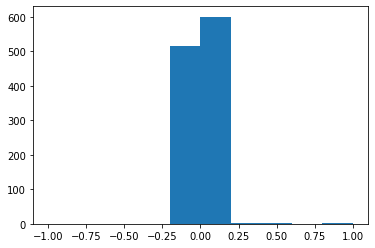

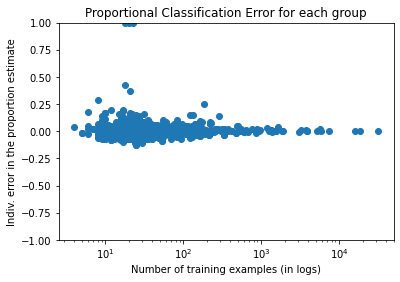

In [0]:
# Define the individual error
diff_bias['indiv_error'] = (diff_bias['clf_pos_freq'] - diff_bias['pos_freq']) / diff_bias['pos_freq']

print("\n Dist of indiv_error \n" ,diff_bias['indiv_error'].describe())
# Note: so many indiv_error is infinite, when I don't apply sub filter!
  # Infinite values won't appear in the scattor plot below.
  # So just transform them as 1?
print("\n Frequency counts of indiv_error \n" ,diff_bias['indiv_error'].value_counts())
# 3843 groups have 0 error. 118 groups have infinite error.

# Transform any values of indiv error >=1 into 1 (it should be between -1 and 1 since it's a normalized value)
# diff_bias['indiv_error'].replace(np.inf, np.nan)
diff_bias['indiv_error'][diff_bias['indiv_error']>=1] = 1 

print("\n The new dist of indiv_error \n" ,diff_bias['indiv_error'].describe())
print("\n The new Frequency counts of indiv_error \n" ,diff_bias['indiv_error'].value_counts())



plt.hist(diff_bias['indiv_error'], range=[-1,1])
plt.show()

plt.scatter(diff_bias['n_train'], diff_bias['indiv_error'])
# plt.xlim(0,100000)
plt.ylim(-1,1)
plt.xlabel('Number of training examples (in logs)')
plt.ylabel('Indiv. error in the proportion estimate')
plt.xscale('log')
# plt.xscale('symlog')

plt.title('Proportional Classification Error for each group');
plt.savefig('q4_2.png')
plt.show()

In [0]:
from google.colab import files
files.download('q4_2.png')

# 3
Based on the above plots, how would you design a bias mitigation intervention